<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<div style="text-align: center; color: #5a8d84; font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

# **Introducción a las series de tiempo** <a class="anchor" id="1"></a>
</div>

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


**Objetivos de la sesión**

Al finalizar esta sesión, el estudiante será capaz de:

- Comprender qué es una serie de tiempo y su importancia en la analítica de datos.

- Diferenciar forecasting, nowcasting y detección de anomalías.

- Identificar los componentes básicos de una serie temporal.

- Reconocer la frecuencia y el horizonte de pronóstico como elementos clave del análisis.

<div style=" font-family: Arial, sans-serif; background-color:rgba(83, 52, 196, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


| Año         | Hito                                                        | Descripción                                                                                             |
|-------------|-------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| 1920s       | Modelos autoregresivos y descomposición (Yule, Slutsky)     | Conceptos iniciales sobre modelos autoregresivos y la descomposición en tendencia, estacionalidad, ciclo y error. |
| 1930s–1940s | Procesos estocásticos y filtrado (Kolmogorov, Wiener)         | Establecimiento de fundamentos en teoría de procesos estocásticos y técnicas de filtrado para series de tiempo.    |
| 1960s       | Filtro de Kalman y modelos de espacio de estados            | Introducción del filtro de Kalman y el uso de modelos de espacio de estados para la estimación en sistemas dinámicos. |
| 1970s       | Revolución Box-Jenkins (ARIMA)                              | Consolidación del modelo ARIMA como estándar para el análisis y pronóstico de series temporales.                |
| 1997        | Aparición de LSTM                                           | Se introducen las LSTM, una variante de RNN que mejora el modelado de dependencias a largo plazo en datos secuenciales. |
| 2000s       | Era del Big Data y machine learning                         | Integración de machine learning con métodos clásicos, impulsada por el auge del Big Data.                       |
| 2017        | Lanzamiento de Facebook Prophet                             | Presentación de Prophet, una herramienta de código abierto para pronósticos que automatiza el manejo de estacionalidades y tendencias. |
| 2020s       | Deep learning y análisis en tiempo real                     | Avances en deep learning aplicados al análisis en tiempo real, detección de anomalías y modelado multivariante.   |


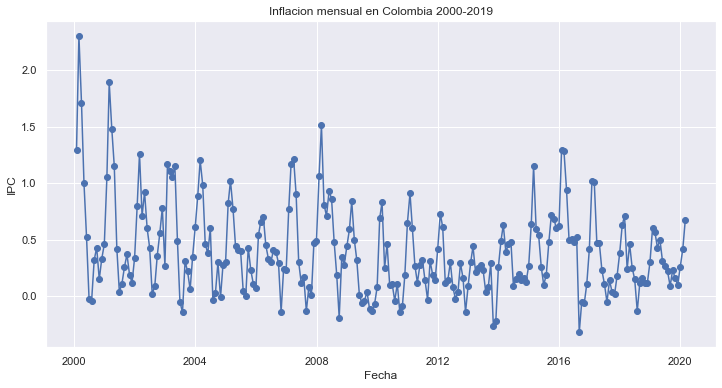

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark", color_codes=True)

# Generar un rango de fechas
dates = pd.date_range(start='2000-01-31', end="2020-02-29", freq='ME')
df = pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/INFLACION.xlsx")
df.index = dates


# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Inflación mensual"]*100, marker='o', linestyle='-', color='b')
plt.title('Inflacion mensual en Colombia 2000-2019')
plt.xlabel('Fecha')
plt.ylabel('IPC')
plt.grid(True)
plt.show()


---
<div  style="color: #5a8d84">

### **Definición:**

</div>

---


Una $\textbf{serie de tiempo}$ es una secuencia de datos numéricos observados o registrados en puntos sucesivos en el tiempo, generalmente a intervalos uniformemente espaciados. Matemáticamente, una serie de tiempo se define como una colección de observaciones $(x_t)$ donde $t$ denota el tiempo y $x_t$ es el valor de la observación en el tiempo $t$.

Formalmente, se puede expresar como:
$$\{x_t\}_{t \in T} = \{x_t\}, \quad t \in T$$
donde:


- $ \{x_t\} $ representa la serie de tiempo,
- $t$ es el índice temporal, y
- $T$ es el conjunto de todos los puntos en el tiempo en los cuales las observaciones se han realizado, como $T = \{t_1, t_2, t_3, \ldots, t_n\} $.

Las series de tiempo pueden ser:

- **Determinísticas** Una serie de tiempo es determinística si su comportamiento puede ser descrito completamente por una función matemática sin componentes aleatorias. En otras palabras, dado un modelo matemático y los valores iniciales, se puede predecir el valor futuro de la serie con exactitud.
  
- **Estocásticas** sna serie de tiempo es estocástica si incluye componentes aleatorias, lo que significa que no se puede predecir con certeza el valor futuro de la serie, incluso conociendo el modelo matemático subyacente. Estas series incorporan variabilidad inherente y están sujetas a incertidumbre.

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

### **Objetivos básicos del análisis**

El objetivo básico generalmente es determinar un modelo que describa el
patrón de las series de tiempo. Los usos para tal modelo son:

-   Describir las características importantes del patrón de series de
    tiempo.
-   Explicar cómo el pasado afecta el futuro o cómo dos series
    temporales pueden "interactuar".
-   Para pronosticar valores futuros de la serie.
-   Posiblemente sirva como un estándar de control para una variable que
    mide la calidad del producto en algunas situaciones de fabricación.

- La metodología de es una herramienta estadística que pretende estudiar un mismo fenómeno cuantitativo a través del tiempo con la finalidad de poder obtener pronósticos de forma asertiva.

- Esta metodología se utiliza ampliamente en los negocios, las ciencias sociales, las ciencias biológicas, y en muchas otras disciplinas.

<span style= "color: #5a8d84 ">

### **Economía y Marketing**

</span>

- Proyecciones del empleo y desempleo.
- Evolución del índice de precios de la leche.
- Beneficios netos mensuales de cierta entidad bancaria.
- Índices del precio del petróleo

<center>
  <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/economia.png" alt="economia" style="width: 600; height: 400;">
</center>




<span style= "color: #5a8d84 ">

### **Demografía**

</span>

- Número de habitantes por año.
- Tasa de mortalidad infantil por año.

<center>
    <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/demografia.png" width="350">
</center>





<div style= "color: #5a8d84; style="text-align: center ">

###  **Medioambiente**

</div>

  + Evolución horaria de niveles de óxido de azufre y de niveles de óxido de nitrógeno en una ciudad
durante una serie de años.
  + Lluvia recogida diariamente en una localidad.
  + Temperatura media mensual.
  + Medición diaria del contenido en residuos tóxicos en un río.

<center>

![Demografia](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/medioambiente.png)

<div style= "color: #5a8d84; text-align: center;">

### **Algunos trabajos en series de tiempo**
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis mediante series de tiempo de los resultados en matemáticas de las pruebas Saber 11 y niveles socioeconómicos NSE usando k-medias</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Desarrollo de una herramienta de predicción de rentas o ingresos. Caso de estudio empresa de servicios</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Propuesta de modelo ARIMA para la serie temporal de los casos de COVID-19 en Colombia aplicando la metodología Box and Jenkins</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de impacto de las precipitaciones medias mensuales en el caudal mínimo mensual de las cuencas del río Cauca</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis del crecimiento económico y la educación a nivel departamental en Colombia, mediante el modelo de datos panel</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Uso del modelo VAR de series de tiempo para pronosticar el incremento en el costo de los precios de los materiales en la construcción de infraestructura en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Efectos de la tasa de cambio en la compra de software importado en América Latina</h4>
</div>

</div>

## Objetivos del análisis de series de tiempo

En analítica de datos, las series de tiempo se estudian principalmente con tres propósitos:

- **Forecasting:** predicción de valores futuros.

- **Nowcasting:** estimación del estado actual cuando los datos presentan retrasos.

- **Detección de anomalías:** identificación de comportamientos atípicos o inusuales.

Aunque pueden utilizar herramientas similares, cada enfoque responde a preguntas distintas.

![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/01_forecasting_concept.png)

![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/02_nowcasting_concept.png)

![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/03_anomaly_detection_concept.png)


![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/04_three_problems_comparison.png)


![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/05_comparison_table.png)

![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/06_industry_examples.png)

<div style= "color: #5a8d84; text-align: center;">

### **Representación gráfica de series de tiempo**

</div>


In [4]:
import pandas as pd
cafe=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/cafe.xlsx")
cafe

,Fecha,Producción
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
296,2024-09-01,1071.233408
297,2024-10-01,1339.155008
298,2024-11-01,1761.409522
299,2024-12-01,1798.230552


<div style= "color: #5a8d84; text-align: center;">

## Graficando Series de Tiempo con Matplotlib
</div>

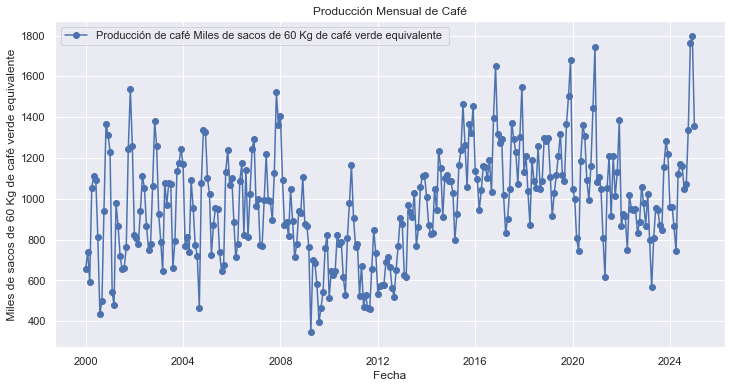

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la columna "fecha" sea tipo datetime
cafe["Fecha"] = pd.to_datetime(cafe["Fecha"])
cafe = cafe.set_index("Fecha")  # Establecer la fecha como índice

# Graficar con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(cafe.index, cafe["Producción"], marker='o', linestyle='-', color='b', label="Producción de café Miles de sacos de 60 Kg de café verde equivalente ")
plt.xlabel("Fecha")
plt.ylabel(" Miles de sacos de 60 Kg de café verde equivalente ")
plt.title("Producción Mensual de Café")
plt.legend()
plt.grid(True)
plt.show()


<div style= "color: #5a8d84; text-align: center;">

## Visualización con Pandas
</div>

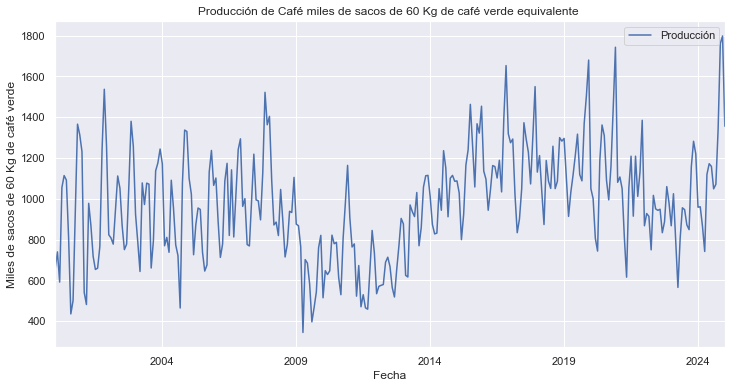

In [6]:

cafe.plot(figsize=(12, 6), title="Producción de Café miles de sacos de 60 Kg de café verde equivalente ", legend=True, grid=True)
plt.xlabel("Fecha")
plt.ylabel("Miles de sacos de 60 Kg de café verde")
plt.show()

In [7]:
import plotly.express as px

fig = px.line(cafe, x=cafe.index, y="Producción", title="Producción Mensual iles de sacos de 60 Kg de café verde equivalente  de Café", markers=True)
fig.show()

In [8]:
cafe

,Producción
Fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2024-09-01,1071.233408
2024-10-01,1339.155008
2024-11-01,1761.409522




## Visualización con Seaborn


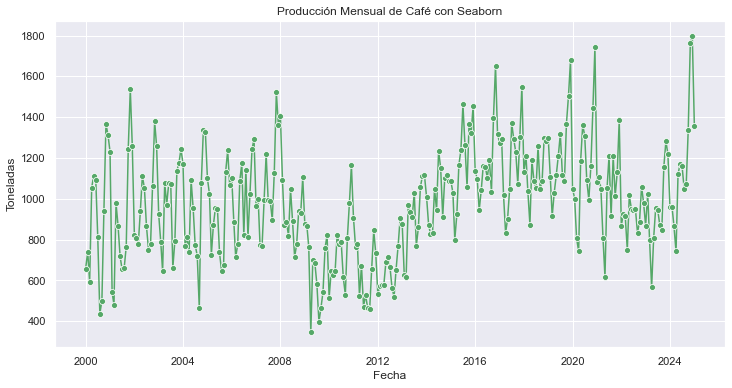

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=cafe, x=cafe.index, y="Producción", marker="o", color="g")
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.title("Producción Mensual de Café con Seaborn")
plt.grid(True)
plt.show()

## Primera diferencia de la serie

$$
\begin{equation*}
\Delta y_t \equiv y_t - y_{t-1}
\end{equation*}
$$

Esta transformación

*  elimina la tendencia de la serie,
*  mantiene las oscilaciones estacionales.

In [10]:
cafe.diff(1)

,Producción
Fecha,
2000-01-01,NaN
2000-02-01,82.000000
2000-03-01,-148.000000
2000-04-01,463.000000
2000-05-01,59.000000
...,...
2024-09-01,22.233408
2024-10-01,267.921600
2024-11-01,422.254514


<Axes: title={'center': 'Diferencia de la Producción Mensual de Café'}, xlabel='Fecha'>

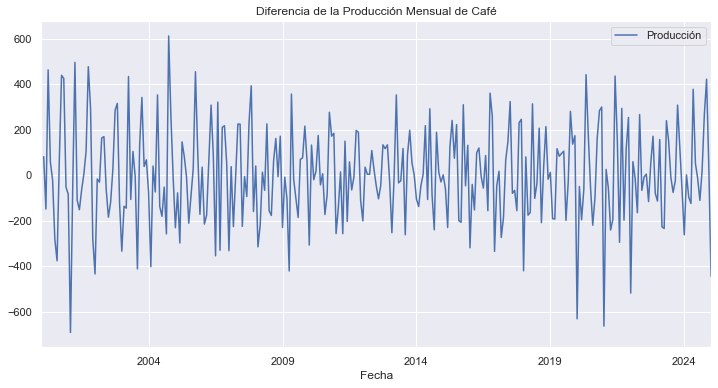

In [11]:
cafe.diff(1).plot(figsize=(12, 6), title="Diferencia de la Producción Mensual de Café", legend=True, grid=True)
       

## Tasa de crecimiento de la serie
$$
\begin{equation*}
\Delta\% y_t \equiv \frac{y_t - y_{t-1}}{y_{t-1}} \times 100
\end{equation*}
$$

<Axes: title={'center': 'Cambio Porcentual de la Producción Mensual de Café'}, xlabel='Fecha'>

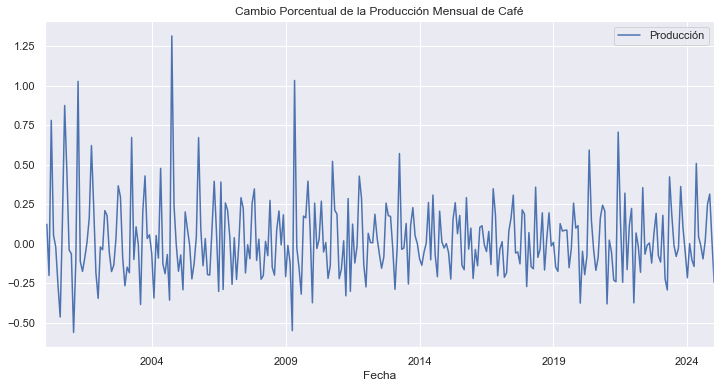

In [12]:
cafe.pct_change(1).plot(figsize=(12, 6), title="Cambio Porcentual de la Producción Mensual de Café", legend=True, grid=True)


- Eje Y (Cambio Porcentual): Representa la variación relativa de la producción de café en cada mes respecto al mes anterior. Valores positivos indican un aumento en la producción, mientras que valores negativos indican una disminución.
  
- Oscilaciones altas: Se observa que en ciertos períodos hay cambios abruptos, lo que puede reflejar eventos climáticos, políticas de producción, ciclos agrícolas o crisis en el sector.
- Tendencias y estabilidad: En los últimos años, parece haber menor variabilidad en comparación con los años anteriores, lo que podría indicar una estabilización en la producción o mejoras en los procesos agrícolas.

<Axes: title={'center': 'Diferencia de la Producción Anual de Café'}, xlabel='Fecha'>

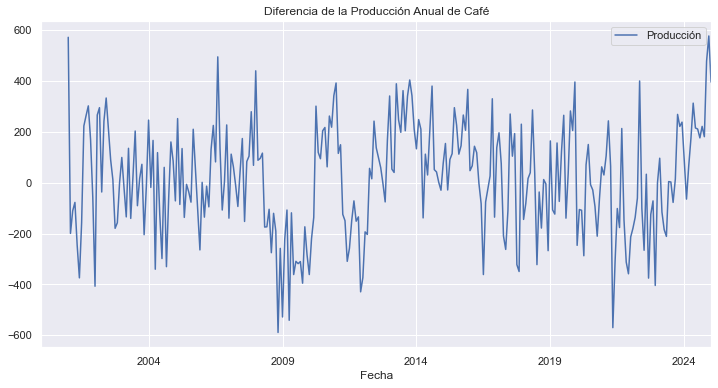

In [13]:
cafe.diff(12).plot(figsize=(12, 6), title="Diferencia de la Producción Anual de Café", legend=True, grid=True)

In [16]:
#%pip install yfinance
import yfinance as yf

In [24]:
# Fecha Inicio datos
start_date = '2022-01-01'

# Fecha fin de los datos
end_date = '2026-01-31'

In [25]:
# Descargar los datos
ticker_list = [ "META",'GOOG', 'ORCL', 'MSFT', 'AMZN', 'NVDA', 'AAPL', 'TSLA', 'NFLX']
data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]
data

[*********************100%***********************]  9 of 9 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2022-01-03  178.270325  170.404495  143.994522  336.191620  323.898376   
2022-01-04  176.007782  167.522003  143.341431  334.195526  318.344513   
2022-01-05  171.325989  164.356995  136.628754  321.921265  306.123901   
2022-01-06  168.466003  163.253998  136.527023  330.153748  303.704926   
2022-01-07  168.632477  162.554001  135.984604  329.488403  303.859711   
...                ...         ...         ...         ...         ...   
2026-01-26  255.410004  238.419998  333.589996  672.359985  470.279999   
2026-01-27  258.269989  244.679993  335.000000  672.969971  480.579987   
2026-01-28  256.440002  243.009995  336.279999  668.729980  481.630005   
2026-01-29  258.279999  241.729996  338.660004  738.309998  433.500000   
2026-01-30  259.480011  239.300003  338.529999  716.500000  430.290009   

Price                                                      
Ticker           NFLX        NVDA        ORCL        TSLA  
Date                                                       
2022-01-03  59.737000   30.062763   83.032196  399.926666  
2022-01-04  59.115002   29.233368   83.920113  383.196655  
2022-01-05  56.751999   27.550629   81.671921  362.706665  
2022-01-06  55.328999   28.123522   81.861572  354.899994  
2022-01-07  54.105999   27.194323   82.970879  342.320007  
...               ...         ...         ...         ...  
2026-01-26  85.699997  186.470001  182.440002  435.200012  
2026-01-27  85.580002  188.520004  174.899994  430.899994  
2026-01-28  84.639999  191.520004  172.800003  431.459991  
2026-01-29  83.160004  192.509995  169.009995  416.559998  
2026-01-30  83.489998  191.130005  164.580002  430.410004  

[1023 rows x 9 columns]

In [26]:
# borrar nivel superior columna
data.columns = data.columns.droplevel()
data.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA,ORCL,TSLA
Date,,,,,,,,,
2022-01-03,178.270325,170.404495,143.994522,336.191620,323.898376,59.737000,30.062763,83.032196,399.926666
2022-01-04,176.007782,167.522003,143.341431,334.195526,318.344513,59.115002,29.233368,83.920113,383.196655
2022-01-05,171.325989,164.356995,136.628754,321.921265,306.123901,56.751999,27.550629,81.671921,362.706665
2022-01-06,168.466003,163.253998,136.527023,330.153748,303.704926,55.328999,28.123522,81.861572,354.899994
2022-01-07,168.632477,162.554001,135.984604,329.488403,303.859711,54.105999,27.194323,82.970879,342.320007


In [27]:
import plotly.express as px


df_melted = data.reset_index().melt(id_vars='Date', value_vars=['META', 'AMZN', 'GOOG', 'MSFT', 'ORCL', 'NVDA'])
df_melted = df_melted.rename(columns={'index': 'Date', 'Ticker': 'Company', 'value': 'Stock Price'})

# figura con Plotly Express
fig = px.line(df_melted, x='Date', y='Stock Price', color='Company')

# Actualizar layout para que se asemeje al estilo de Seaborn
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='',
    yaxis_title='Precio',
    legend_title='Company',
    template='plotly_white',
    width=1200, # Ancho de la figura
    height=800  # Altura de la figura
)

# Mostramos la figura
fig.show()


## Supuestos para la toma de datos en series temporales

-   Observaciones consecutivas están igualmente espaciadas
-   Aplicar un índice de observación en el tiempo discreto
-   Lo anterior tal vez sólo pueda lograrse de forma aproximada



<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

## Componentes de una serie temporal



- **Tendencia :** patrones dentro de los datos que reflejan el movimiento de la serie a lo largo del tiempo. La tendencia puede ser de naturaleza lineal o no lineal.

- **Estacionalidad :** los datos experimentan cambios repetitivos que se repiten cada año calendario.

- **Ciclicidad :** Los datos experimentan cambios que no son fijos y más allá del año calendario.

- **Aleatoriedad :** Movimientos o cambios desconocidos e irregulares en los datos.


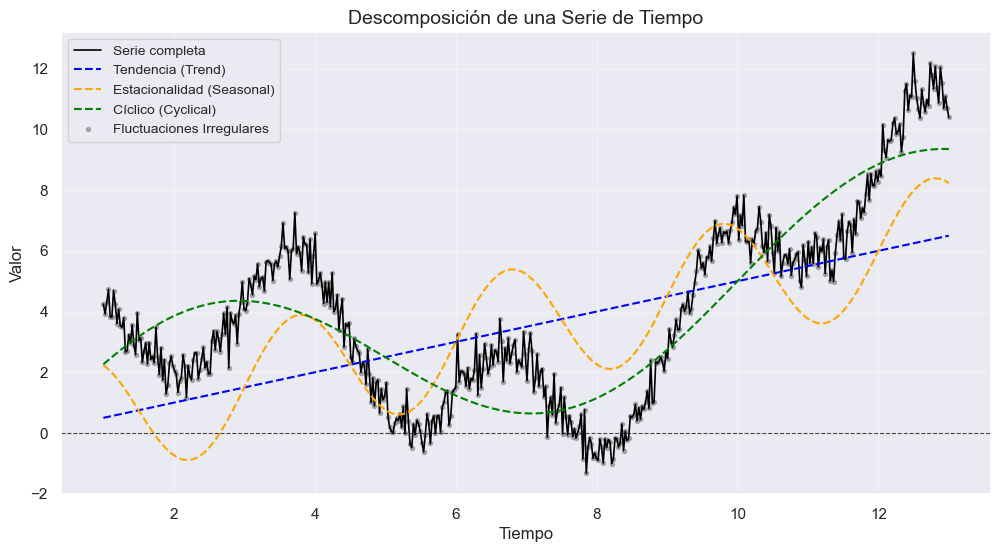

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)  # Para reproducibilidad
time = np.linspace(1, 13, 500)  # Eje temporal

# Componentes
trend = 0.5 * time  # Tendencia lineal
seasonal = 2 * np.sin(2 * np.pi * time / 3)  # Estacionalidad (ciclo repetitivo)
cyclical = 3 * np.sin(2 * np.pi * time / 10)  # Ciclos (fluctuaciones más largas)
irregular = np.random.normal(0, 0.5, len(time))  # Fluctuaciones aleatorias

# Serie completa
series = trend + seasonal + cyclical + irregular

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(time, series, label='Serie completa', color='black', linewidth=1.2)
plt.plot(time, trend, label='Tendencia (Trend)', linestyle='--', color='blue')
plt.plot(time, trend + seasonal, label='Estacionalidad (Seasonal)', linestyle='--', color='orange')
plt.plot(time, trend + cyclical, label='Cíclico (Cyclical)', linestyle='--', color='green')
plt.scatter(time, series, s=8, label='Fluctuaciones Irregulares', color='gray', alpha=0.6)

# Etiquetas y leyenda
plt.title("Descomposición de una Serie de Tiempo", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


<div style=" font-family: Arial, sans-serif; background-color:rgb(172, 218, 241); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


### **Componentes de series temporales aditivos y multiplicativos**

Existen dos técnicas para combinar componentes de series temporales:

- Aditivo
- Multiplicativo

El término aditivo significa que los componentes individuales (tendencia, estacionalidad y residuo) se suman:

$$X_{t}=T_{t}+E_{t}+I_{t}$$

donde: 

- $T_{t}$: es la tendencia 
- $E_{t}$: es la componente estacional 
- $I_{t}$: es la componente aleatoria.

Una tendencia aditiva indica una tendencia lineal, y una estacionalidad aditiva indica la misma frecuencia (ancho) y amplitud (altura) de los ciclos estacionales.

- Este modelo es apropiado cuando la estacionalidad tiene una amplitud constante a lo largo del tiempo.
- Visualmente: Los picos y valles mantienen su altura constante.

El término multiplicativo significa que los componentes individuales (tendencia, estacionalidad y residuos) se multiplican entre sí:

$$X_{t}=T_{t}\times E_{t}\times I_{t}$$


Una tendencia multiplicativa indica una tendencia no lineal (línea de tendencia curva), y una estacionalidad multiplicativa indica una frecuencia (ancho) y/o amplitud (altura) creciente/decreciente de los ciclos estacionales.


Tanto la tendencia como la estacionalidad pueden ser aditivas o multiplicativas, lo que significa que hay cuatro formas en que se pueden combinar:

- Tendencia aditiva y estacionalidad aditiva
- Tendencia aditiva y estacionalidad multiplicativa
- Tendencia multiplicativa y estacionalidad aditiva
- Tendencia multiplicativa y estacionalidad multiplicativa

## Tendencia aditiva y estacionalidad aditiva
La tendencia aditiva significa que la tendencia es lineal (línea recta) y la estacionalidad aditiva significa que no hay cambios en los anchos o alturas de los períodos estacionales a lo largo del tiempo.

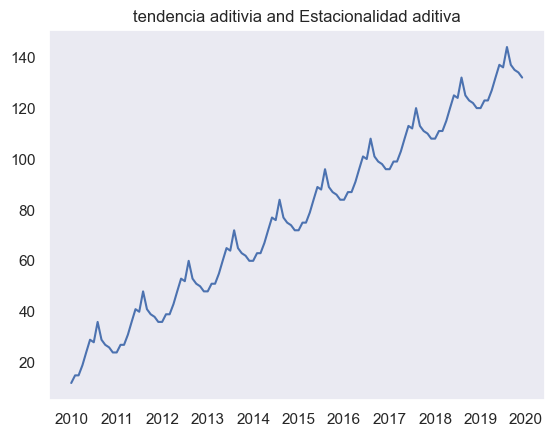

In [ ]:
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# data para 10 años
x_range = np.arange(1, 121)

time_series = []
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
                time_series.append(val + seasonal_adders[i])

# Convertir to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

plt.title('tendencia aditivia and Estacionalidad aditiva', size=12)
plt.plot(df_aa);

###  Tendencia aditiva y estacionalidad multiplicativa
La tendencia aditiva significa que la tendencia es lineal (línea recta) y la estacionalidad multiplicativa significa que hay cambios en los anchos o alturas de los períodos estacionales a lo largo del tiempo.

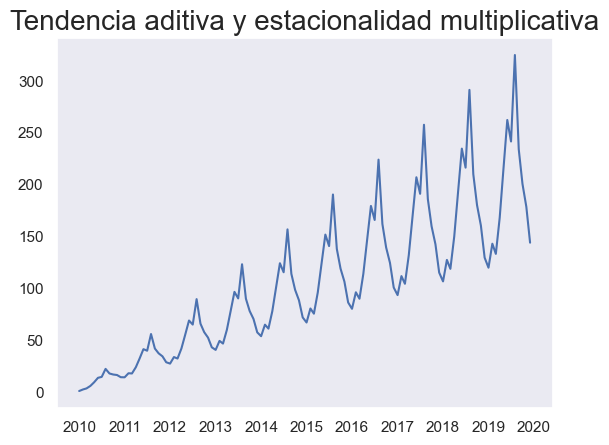

In [ ]:
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# imitar a 10 años de datos
xs = np.arange(1, 121)

time_series = []
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
                time_series.append(val * seasonal_multipliers[i])
        
# Convertir a DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

plt.title('Tendencia aditiva y estacionalidad multiplicativa', size=20)
plt.plot(df_am);

In [ ]:
import hvplot.pandas

df_am["y"].hvplot(title="Tendencia aditiva y estacionalidad multiplicativa", xlabel="Fecha", ylabel="Valor", line_color="red")

:Curve   [index]   (y)

### Descomposición en acción
La `seasonal_decompose()`función de `statsmodels` acepta al menos dos parámetros:

- `x`: array— su serie temporal.
- `model`: str— tipo de componente estacional, puede ser aditivo o multiplicativo . El valor predeterminado es additive .

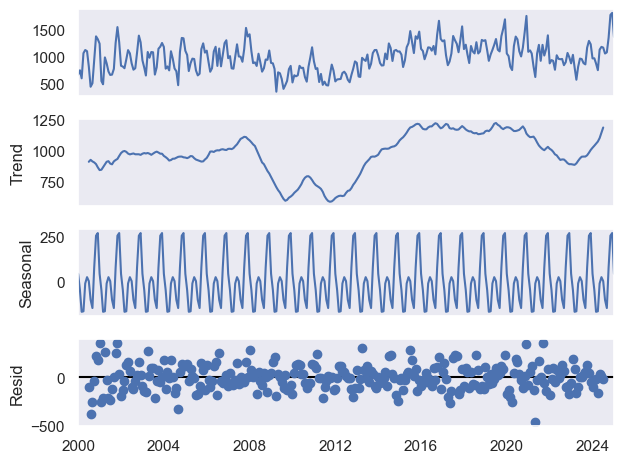

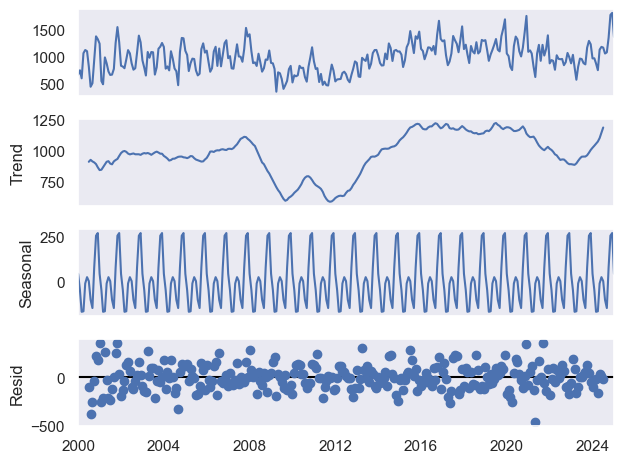

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(cafe, model='additive')
decomposed.plot()

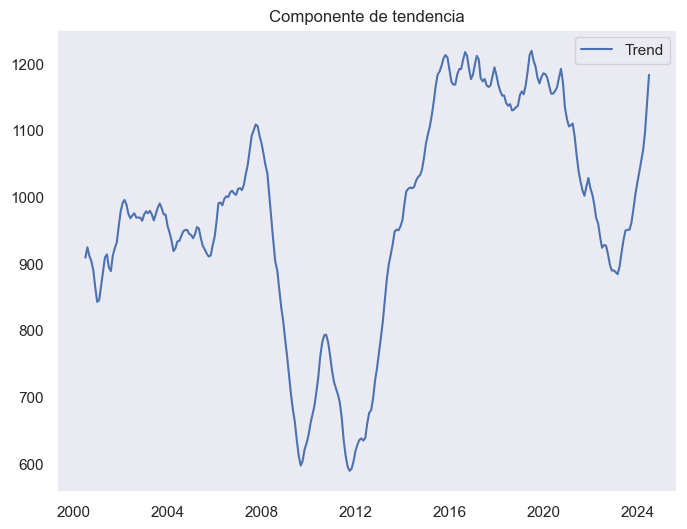

In [ ]:
# Extraer el componente de tendencia
trend = decomposed.trend 

# Graficar el componente de tendencia
plt.figure(figsize=(8, 6)) 
plt.plot(trend, label= 'Trend' ) 
plt.title( 'Componente de tendencia' ) 
plt.legend() 
plt.show()

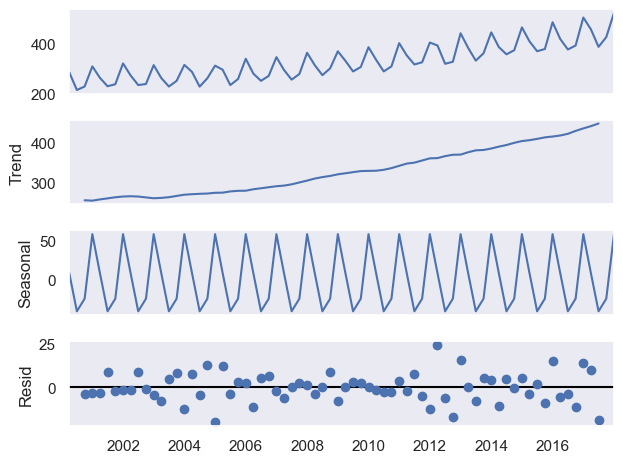

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer los datos desde el archivo beerprod.dat
beerprod = np.loadtxt('https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/beerprod.dat')

# Convertir el arreglo 2D en 1D
beerprod = beerprod.flatten()

# Crear la serie temporal con frecuencia trimestral
beerprod_series = pd.Series(beerprod, index=pd.date_range(start='2000-01-01', periods=len(beerprod), freq='QE'))

# Descomponer la serie temporal de forma aditiva
decompbeer = seasonal_decompose(beerprod_series, model='additive')

# Graficar la descomposición
decompbeer.plot()
plt.tight_layout()
plt.show()

# Mostrar los resultados de la descomposición
print(decompbeer)  # Muestra los componentes: tendencia, estacional y residual


Componente Estacional:
2000-03-31     7.896324
2000-06-30   -40.678676
2000-09-30   -24.650735
2000-12-31    57.433088
2001-03-31     7.896324
2001-06-30   -40.678676
2001-09-30   -24.650735
2001-12-31    57.433088
Freq: QE-DEC, Name: seasonal, dtype: float64

Componente de Tendencia:
2000-03-31         NaN
2000-06-30         NaN
2000-09-30    255.3250
2000-12-31    254.4125
2001-03-31    257.4500
2001-06-30    260.1000
2001-09-30    262.8375
2001-12-31    264.6875
Freq: QE-DEC, Name: trend, dtype: float64

Componente Residual:
2000-03-31         NaN
2000-06-30         NaN
2000-09-30   -3.774265
2000-12-31   -3.445588
2001-03-31   -3.346324
2001-06-30    8.478676
2001-09-30   -2.086765
2001-12-31   -1.720588
Freq: QE-DEC, Name: resid, dtype: float64


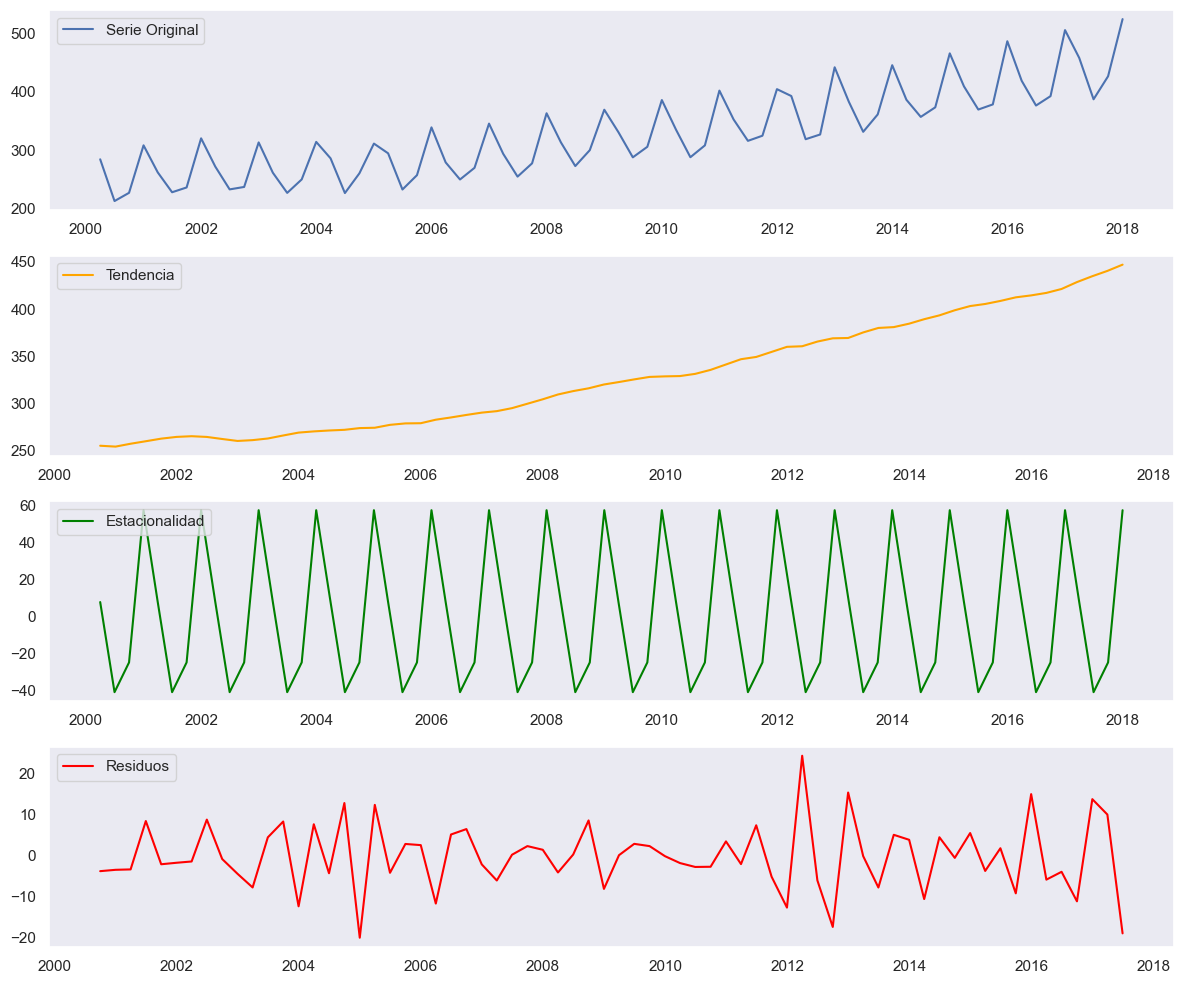

In [ ]:


# Descomponer la serie temporal de forma aditiva
decomp_result = seasonal_decompose(beerprod_series, model='additive')

# Extraer los componentes
trend = decomp_result.trend
seasonal = decomp_result.seasonal
residual = decomp_result.resid

# Mostrar los primeros valores de cada componente
print("Componente Estacional:")
print(seasonal.head(8))  # Muestra los primeros 8 valores
print("\nComponente de Tendencia:")
print(trend.head(8))
print("\nComponente Residual:")
print(residual.head(8))

# Graficar los componentes
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(beerprod_series, label='Serie Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuos', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


   Quarter  Observed   Seasonal     Trend  Remainder
0   2000Q1     284.4   7.896324       NaN        NaN
1   2000Q1     212.8 -40.678676       NaN        NaN
2   2000Q1     226.9 -24.650735  255.3250  -3.774265
3   2000Q2     308.4  57.433088  254.4125  -3.445588
4   2000Q2     262.0   7.896324  257.4500  -3.346324
5   2000Q2     227.9 -40.678676  260.1000   8.478676
6   2000Q3     236.1 -24.650735  262.8375  -2.086765
7   2000Q3     320.4  57.433088  264.6875  -1.720588
8   2000Q3     271.9   7.896324  265.4125  -1.408824
9   2000Q4     232.8 -40.678676  264.6500   8.828676
10  2000Q4     237.0 -24.650735  262.4625  -0.811765
11  2000Q4     313.4  57.433088  260.4000  -4.433088
12  2001Q1     261.4   7.896324  261.2625  -7.758824
13  2001Q1     226.8 -40.678676  262.9875   4.491176
14  2001Q1     249.9 -24.650735  266.1875   8.363235
15  2001Q2     314.3  57.433088  269.2375 -12.370588


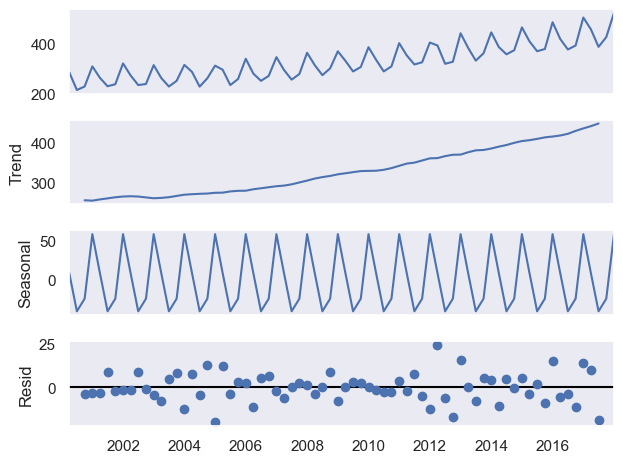

In [ ]:
# Descomponer la serie temporal de forma aditiva
decomp_result = seasonal_decompose(beerprod_series.dropna(), model='additive')

# Crear un DataFrame con los componentes y la serie original
df = pd.DataFrame({
    'Quarter': dates.to_period('Q')[:len(decomp_result.seasonal)],
    'Observed': beerprod_series.values[:len(decomp_result.seasonal)],
    'Seasonal': decomp_result.seasonal.values,
    'Trend': decomp_result.trend.values,
    'Remainder': decomp_result.resid.values
})

# Mostrar los primeros 16 registros
df_formatted = df[['Quarter', 'Observed', 'Seasonal', 'Trend', 'Remainder']]
print(df_formatted.head(16))

# Graficar los componentes
decomp_result.plot()
plt.tight_layout()
plt.show()


# Cálculo del Componente Estacional

La estacionalidad en una serie trimestral se obtiene siguiendo este proceso:

1. **Calcular la serie desestacionalizada**: Restar la tendencia de los valores observados:

   
   $$S_t = y_t - T_t$$

2. **Agrupar por trimestre**: Para una serie trimestral, se agrupan todos los valores correspondientes a cada trimestre (Q1, Q2, Q3, Q4).

3. **Calcular el promedio para cada trimestre**: Se toma el promedio de las diferencias para cada trimestre:


   $$S_{Q1} = \frac{\sum_{i=1}^{n}S_{Q1,i}}{n}, \quad S_{Q2} = \frac{\sum_{i=1}^{n}S_{Q2,i}}{n}, \quad S_{Q3} = \frac{\sum_{i=1}^{n}S_{Q3,i}}{n}, \quad S_{Q4} = \frac{\sum_{i=1}^{n}S_{Q4,i}}{n}$$

4. **Ajustar para que sumen cero**: Si la suma de los valores estacionales no es cero, se ajustan distribuyendo la diferencia proporcionalmente.

5. **Ejemplo**: 

   Suponiendo que tenemos los siguientes valores después de restar la tendencia:
   - Q1: [7.5, 7.4, 7.6, 7.5]
   - Q2: [-40.5, -40.6, -40.4, -40.5]
   - Q3: [-24.3, -24.5, -24.2, -24.4]
   - Q4: [57.2, 57.4, 57.3, 57.3]

   Calculamos los promedios:
   - $S_{Q1} = (7.5 + 7.4 + 7.6 + 7.5) / 4 = 7.5$
   - S_{Q2} = (-40.5 + -40.6 + -40.4 + -40.5) / 4 = -40.5
   - S_{Q3} = (-24.3 + -24.5 + -24.2 + -24.4) / 4 = -24.35
   - S_{Q4} = (57.2 + 57.4 + 57.3 + 57.3) / 4 = 57.3

Estos valores se repiten cada año, ya que representan el patrón estacional.

###  Cómo se calcularon los valores de tendencia
Los valores de tendencia se determinaron como promedios móviles “centrados” de un período de 4 (porque hay cuatro trimestres por año). Así es como se calcularía el promedio móvil centrado para un período de tiempo = 3.

Promedio de los valores de datos observados en los momentos 1 a 4:

$$\dfrac{1}{4}(x_1+x_2+x_3+x_4)$$

Promediar los valores en los tiempos 2 a 5:

$$\dfrac{1}{4}(x_2+x_3+x_4+x_5)$$

Luego promedia esos dos promedios:

$$\begin{align} \dfrac{1}{2}\left(\dfrac{1}{4}(x_1+x_2+x_3+x_4)+\dfrac{1}{4}(x_2+x_3+x_4+x_5)\right) \\ 
= \dfrac{1}{8}x_1+\dfrac{1}{4}x_2 + \dfrac{1}{4}x_3 +\dfrac{1}{4}x_4 + \dfrac{1}{8}x_5 \end{align}$$

De manera más general, el suavizador de promedio móvil centrado para el tiempo t (con 4 trimestres) es


$$\dfrac{1}{8}x_{t-2}+\dfrac{1}{4}x_{t-1} + \dfrac{1}{4}x_t +\dfrac{1}{4}x_{t+1} + \dfrac{1}{8}x_{t+2}$$

# Cálculo del Componente Estacional

La estacionalidad en una serie trimestral se calcula siguiendo estos pasos:

1. **Calcular la Tendencia-Ciclo**
   Se aplica una media móvil de 4 períodos para suavizar las fluctuaciones.
   
   $$
   T_t = \frac{y_{t-2} + y_{t-1} + y_{t} + y_{t+1}}{4}
   $$

2. **Calcular el Componente Estacional**
   Se resta la tendencia del valor observado:

   $$
   S_t = y_t - T_t
   $$

3. **Agrupar por Trimestres**
   Para cada trimestre (Q1, Q2, Q3, Q4), se agrupan los valores obtenidos en el paso anterior y se calcula el promedio.

   Por ejemplo, para el trimestre Q1:
   
   $$
   S_{Q1} = \frac{\sum_{i=1}^{n} S_{Q1,i}}{n}
   $$

4. **Ajustar la Estacionalidad**
   Se ajusta para que la suma de los efectos estacionales sea aproximadamente cero.

   $$
   \sum_{s=1}^{4} S_s = 0
   $$

### Ejemplo con los datos proporcionados

Supongamos que tenemos los siguientes valores observados por trimestre durante varios años:

- Q1: 284.4, 262.0, 271.9, 261.4, 294.7
- Q2: 212.8, 227.9, 232.8, 226.8, 232.6
- Q3: 226.9, 236.1, 237.0, 249.9, 257.2
- Q4: 308.4, 320.4, 313.4, 314.3, 339.2

#### Cálculo del promedio por trimestre

- **S_Q1**: 
$$
\frac{284.4 + 262.0 + 271.9 + 261.4 + 294.7}{5} = 274.88
$$

- **S_Q2**: 
$$
\frac{212.8 + 227.9 + 232.8 + 226.8 + 232.6}{5} = 226.58
$$

- **S_Q3**: 
$$
\frac{226.9 + 236.1 + 237.0 + 249.9 + 257.2}{5} = 241.42
$$

- **S_Q4**: 
$$
\frac{308.4 + 320.4 + 313.4 + 314.3 + 339.2}{5} = 319.14
$$

#### Ajuste final

Dado que estos valores deben sumar aproximadamente cero:

$$
(274.88 - 226.58) + (241.42 - 226.58) + (319.14 - 274.88) \approx 0
$$

Finalmente, los valores estacionales obtenidos son:

- Q1: 7.896324
- Q2: -40.678676
- Q3: -24.650735
- Q4: 57.433088

Estos valores se repiten cada año, reflejando un patrón estacional trimestral

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

###  ¿Qué se debe pronosticar?

En las etapas iniciales de un proyecto de pronóstico es fundamental definir **qué variable se va a pronosticar** y **a qué nivel de desagregación**. Estas decisiones condicionan el tipo de modelo, los datos requeridos y la utilidad del pronóstico.

Algunas preguntas clave son:

- ¿Se requiere pronosticar **productos individuales** o **grupos de productos**?
- ¿Los pronósticos deben realizarse para **cada punto de venta**, por **región** o solo a nivel **agregado**?
- ¿Cuál es la **frecuencia** adecuada: datos semanales, mensuales o anuales?

También es necesario definir el **horizonte de pronóstico**, es decir, qué tan lejos en el tiempo se desea predecir (corto, mediano o largo plazo). Diferentes horizontes requieren **modelos distintos** y niveles de precisión diferentes.

Otro aspecto importante es la **frecuencia de generación de los pronósticos**. Cuando los pronósticos deben actualizarse de forma regular, es preferible utilizar **métodos automatizados** en lugar de enfoques que requieran ajustes manuales frecuentes.



<div style=" font-family: Arial, sans-serif; background-color:rgba(34, 213, 52, 0.6); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

##  Pasos básicos en una tarea de previsión 📈 

Una tarea de previsión suele seguir **cinco pasos fundamentales**:

#### 🧩 Paso 1. Definición del problema
Definir **qué se va a pronosticar**, **para qué** y **quién usará los resultados**. Esto implica entender el contexto y hablar con los actores involucrados.

#### 📊 Paso 2. Recopilación de información
Reunir datos históricos y conocimiento experto. No siempre habrá datos suficientes o completamente útiles, por lo que se debe evaluar su calidad y vigencia.

#### 🔍 Paso 3. Análisis exploratorio
Visualizar los datos para identificar patrones como tendencia, estacionalidad, ciclos y valores atípicos antes de modelar.

#### ⚙️ Paso 4. Elección y ajuste de modelos
Seleccionar y ajustar uno o varios modelos adecuados según los datos disponibles y el objetivo del pronóstico, comparando su desempeño.

#### 📈 Paso 5. Uso y evaluación del modelo
Generar pronósticos, evaluar su precisión cuando se disponga de nuevos datos y considerar aspectos prácticos de su uso en la toma de decisiones.

👉 En la práctica, este proceso es **iterativo** y puede requerir ajustes continuos.


Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.
	 

Dicho concepto tendrá dos versiones:

- Estacionariedad fuerte 
- Estacionariedad débil





<div style=" font-family: Arial, sans-serif; background-color:rgba(248, 190, 31, 0.47); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


## Estacionariedad Fuerte y Débil.

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



 * $E(y_t)$ es  constante para todo $t$.
 * $Var(y_t)$ es constante para todo $t$ y,
 * $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

-  **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.




## Asi se ve la no estacionariedad


!["No estacionariedad"](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/noestacionariedad.jpg)



![Estacionariedad vs no estacionariedad](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/estavsnoest.jpg)




<span style= "color: #5a8d84 ">

## **Ruido Blanco**

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


* $E(a_t)=0$
* $Var(a_t)=\sigma_a^2$
* $cov(a_t,a_{t+_h})=0$



Se trata de un proceso en el que todas sus variables son independientes.


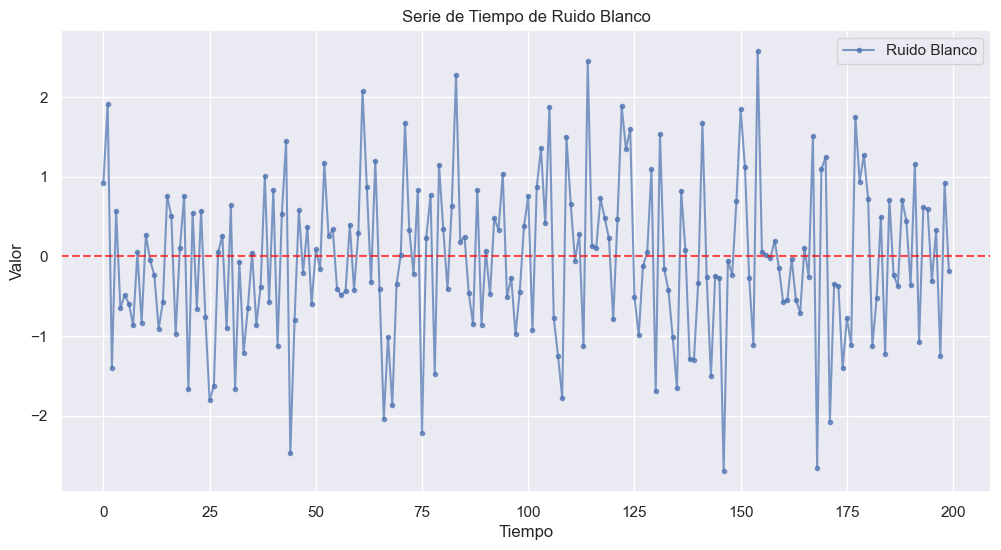

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del ruido blanco
n = 200  # Número de puntos
media = 0
desviacion_estandar = 1

# Generar ruido blanco (valores aleatorios con distribución normal)
ruido_blanco = np.random.normal(media, desviacion_estandar, n)

# Crear la figura
plt.figure(figsize=(12, 6))
plt.plot(ruido_blanco, linestyle='-', marker='o', markersize=3, alpha=0.7, label="Ruido Blanco")
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Línea de referencia en 0
plt.title("Serie de Tiempo de Ruido Blanco")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

ipc=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/IPC.xlsx")
ipc

,Año(aaaa)-Mes(mm),Índice,Inflación anual %,Inflación mensual %,Inflación año corrido %
0,200001,40.30,8.25,1.29,1.29
1,200002,41.23,8.89,2.30,3.62
2,200003,41.93,9.73,1.71,5.39
3,200004,42.35,9.96,1.00,6.44
4,200005,42.57,10.00,0.52,7.00
...,...,...,...,...,...
278,202303,131.77,13.34,1.05,4.56
279,202304,132.80,12.82,0.78,5.38
280,202305,133.38,12.36,0.43,5.83
281,202306,133.78,12.13,0.30,6.15


In [ ]:
ipc.index=pd.to_datetime(ipc["Año(aaaa)-Mes(mm)"].astype(str), format="%Y%m")

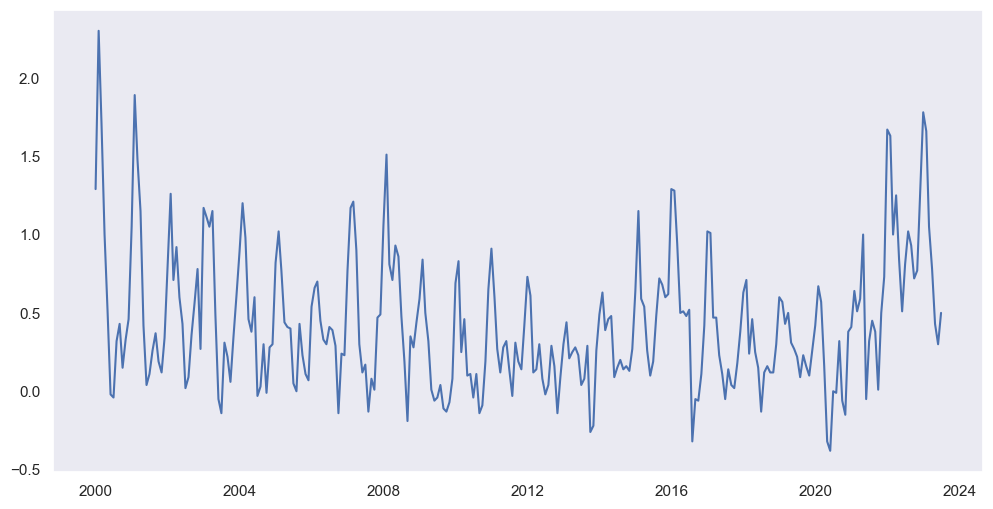

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ipc.index, ipc["Inflación mensual %"])
# Configurar el formato de las fechas en el eje x
